# CS-6600 Homework 1 - NumPy Basics in Jupyter Notebooks

*Weber State University*

**Your Name**:


The goal of this assignment is to help you get familiar with the basics of working with a Jupyter notebook, and with using the [NumPy](https://numpy.org/doc/stable/index.html) library.

### Hello World!

First, let's let's make sure your Jupyter notebook is running. Run the code below:

In [ ]:
print("Hello World!")

Hello World!


Did it print "Hello World!"? Good.

You, as a representative of the world, should introduce yourself to your Jupyter notebook. Crate a code cell below that does so - have it print "Hello! My name is YOUR_NAME." Here YOUR_NAME should be filled in with, well, your name.

Please don't delete the *START CODE HERE* and *END CODE HERE* comments, and please keep all your code between them.

In [ ]:
### START CODE HERE ###
print("Hello! My name is Bradon Barfuss")
### END CODE HERE ###

Hello! My name is Bradon Barfuss


Glad you're now introduced.

### The Sigmoid Function

Next, let's create a function in Python that implements the "sigmoid" function in math, a function that we'll see again later in this course.

<center>
  $\displaystyle sigmoid(x) = \frac{1}{1+e^{-x}}$
</center>

We'll import the *math* library to do so, and use the built-in *math.exp* function.

In [3]:
import math

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

We can graph this function using the pyplot library from mathplotlib. Don't worry about understanding how to use this yet.

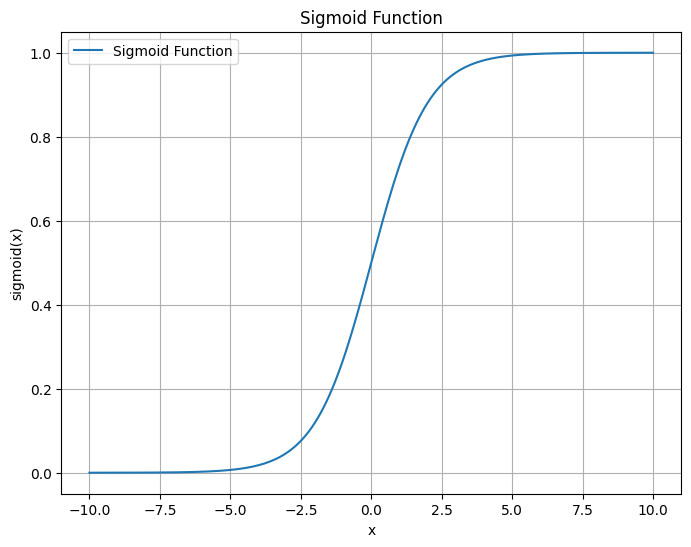

In [4]:
import matplotlib.pyplot as plt

# Generate a list of x values from -10 to 10 (reasonable range)
x_values = []
value = -10.0
while value <= 10.0:
  x_values.append(value)
  value += 0.1

# Apply the sigmoid function to the x values
y_values = [sigmoid(x) for x in x_values]

# Plot the sigmoid function
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Sigmoid Function')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid(True)
plt.legend()
plt.show()

This isn't the best way to do it, for many reasons. One is that we'll run into trouble if we try to apply our sigmoid function to a list of values.

In [ ]:
x = [-1,0,1]
sigmoid(x)

TypeError: bad operand type for unary -: 'list'

Womp womp.

Let's rewrite this using numpy. First, we'll import the numpy library, and then we'll redefine the sigmoid function using the *np.exp* function, which is the same mathematical operations as *math.exp*, but is build for numpy arrays.

In [5]:
import numpy as np

### Define the sigmoid function using np.exp()
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
    ###YOUR CODE HERE

We can create the chart above using this new sigmoid function more efficiently:

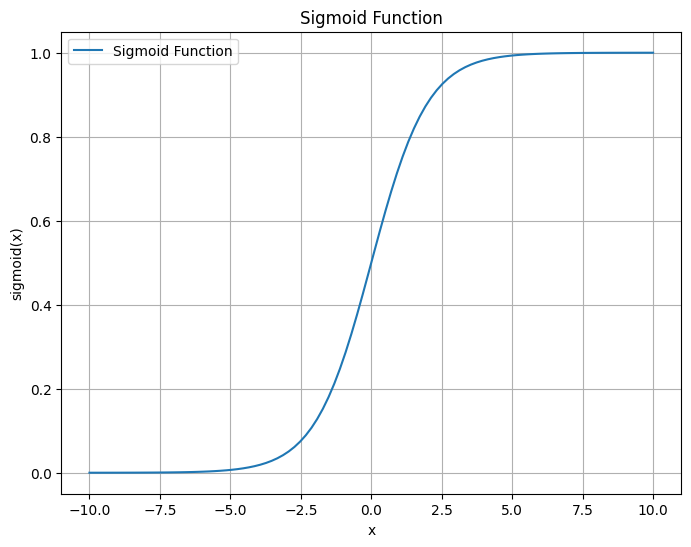

In [ ]:
# Generate an array of x values from -10 to 10 (reasonable range)
x_values = np.linspace(-10, 10, 100)

# Apply the sigmoid function to the x values
y_values = sigmoid(x_values)

# Plot the sigmoid function
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Sigmoid Function')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid(True)
plt.legend()
plt.show()

You see how the new *sigmoid* function applied to the entire array of values? It's less code, and it's **much** faster.

### Reshaping Arrays

Numpy arrays are multidimensional. As such, you'll frequently want to know what their shape is, or even change (reshape) them. The methods *shape* and *reshape* facilitate this.

For example, suppose I have the array:

In [ ]:
X = np.array([[1,2,3],[4,5,6]])

The shape of this array is:

In [ ]:
X.shape

(2, 3)

I can reshape this into a 1-dimensional array with:

In [ ]:
X.reshape(6)

array([1, 2, 3, 4, 5, 6])

Note that reshaping the array produces a new array as its output, but it doesn't alter the original.

In [ ]:
X

array([[1, 2, 3],
       [4, 5, 6]])

Frequently with images, you're given a 3-dimensional array. The first two dimensional are the image width and height, while the third is its three RGB color values. For example, an image may be represented as:

In [ ]:
np.random.seed(42) #Set the seed value for the random number generator, so that the "random" numbers it returns are consistent.

image_array = np.random.randint(0,255,(5,5,3))
image_array

array([[[102, 179,  92],
        [ 14, 106,  71],
        [188,  20, 102],
        [121, 210, 214],
        [ 74, 202,  87]],

       [[116,  99, 103],
        [151, 130, 149],
        [ 52,   1,  87],
        [235, 157,  37],
        [129, 191, 187]],

       [[ 20, 160, 203],
        [ 57,  21, 252],
        [235,  88,  48],
        [218,  58, 254],
        [169, 219, 187]],

       [[207,  14, 189],
        [189, 174, 189],
        [ 50, 107,  54],
        [243,  63, 248],
        [130, 228,  50]],

       [[134,  20,  72],
        [166,  17, 131],
        [ 88,  59,  13],
        [241, 249,   8],
        [ 89,  52, 129]]])

This is a $5 \times 5 \times 3$ array. Suppose we want to flatten it and turn it into a one-dimensional array, write a program that does this. Specifically, write a program that takes a $n \times m \times r$ numpy array, and returns its elements as a 1-dimensional array.

In [ ]:
def image2vector(image):
  ###START CODE HERE###

  image_array = image.reshape(75)
  return(image_array)
  ###STOP CODE HERE###

In [ ]:
image_array.shape
image2vector(image_array)

array([102, 179,  92,  14, 106,  71, 188,  20, 102, 121, 210, 214,  74,
       202,  87, 116,  99, 103, 151, 130, 149,  52,   1,  87, 235, 157,
        37, 129, 191, 187,  20, 160, 203,  57,  21, 252, 235,  88,  48,
       218,  58, 254, 169, 219, 187, 207,  14, 189, 189, 174, 189,  50,
       107,  54, 243,  63, 248, 130, 228,  50, 134,  20,  72, 166,  17,
       131,  88,  59,  13, 241, 249,   8,  89,  52, 129])

### Broadcasting and the Softmax

The softmax function is a mathematical function that converts a vector of raw scores (also called logits or unnormalized log probabilities) into a vector of probabilities. The output probabilities are proportional to the exponentials of the input numbers, and they sum to 1. The softmax function is widely used in machine learning, particularly in the context of classification tasks.

The mathematical definition of the softmax is:
For a vector $\textbf{x} = [x_{1},x_{2},\ldots,x_{n}]$, the softmax is:

<center>  
  $\displaystyle \left[\frac{e^{x_{1}}}{\sum_{j = 1}^{n}e^{x_{j}}},\frac{e^{x_{2}}}{\sum_{j = 1}^{n}e^{x_{j}}},\ldots,\frac{e^{x_{n}}}{\sum_{j = 1}^{n}e^{x_{j}}}\right]$
</center>


Create a softmax function using numpy broadcasting (applying the same operation to every element of an array):

In [21]:
def softmax(x):
    """Calculates the softmax for each row of the input x.

    Your code should work for a row vector and also for matrices of shape (n, m).

    Argument:
    x -- A numpy matrix of shape (n,m)

    Returns:
    s -- A numpy matrix equal to the softmax of x, of shape (n,m)
    """

    # Apply exp() element-wise to x. Use np.exp(...).
    print("base numbers: ", x)
    x_exp = np.exp(x)

    print("e ^ numbers: ", x_exp)

    # Create a vector x_sum that sums each row of x_exp. Use np.sum(..., axis = 1, keepdims = True).
    x_sum = np.sum(x_exp, axis = 1, keepdims=True)### YOUR CODE HERE
    print("Sum: ", x_sum)
    # Compute softmax(x) by dividing x_exp by x_sum. It should automatically use numpy broadcasting.
    s = x_exp/x_sum ### YOUR CODE HERE


    return s

In [23]:
x = np.array([
    [9, 2, 5, 0, 0],
    [7, 5, 0, 0 ,0]])

print("softmax(x) = " + str(softmax(x)))


base numbers:  [[9 2 5 0 0]
 [7 5 0 0 0]]
e squared numbers:  [[8.10308393e+03 7.38905610e+00 1.48413159e+02 1.00000000e+00
  1.00000000e+00]
 [1.09663316e+03 1.48413159e+02 1.00000000e+00 1.00000000e+00
  1.00000000e+00]]
Sum:  [[8260.88614278]
 [1248.04631753]]
softmax(x) = [[9.80897665e-01 8.94462891e-04 1.79657674e-02 1.21052389e-04
  1.21052389e-04]
 [8.78679856e-01 1.18916387e-01 8.01252314e-04 8.01252314e-04
  8.01252314e-04]]


### That's It For Today!

When this is done, please upload your completed notebook to Canvas for grading. Thank you!